## Getting the symbol probabilities

    After getting compression_metrics.csv


In [1]:
import pandas as pd
import csv
from typing import Dict

def parse_symbol_probabilities(prob_string: str) -> Dict[str, float]:
    """
    Parse symbol probability string into a dictionary
    
    Args:
        prob_string (str): Raw probability string
    
    Returns:
        Dict[str, float]: Parsed symbol probabilities
    """
    probabilities = {}
    # Remove trailing semicolon and split
    symbols = prob_string.rstrip('; ').split('; ')
    
    for symbol_prob in symbols:
        symbol, prob_str = symbol_prob.split(':')
        # Remove '%' and convert to float
        prob = float(prob_str.rstrip('%'))
        probabilities[symbol] = prob
    
    return probabilities

def transform_probabilities_to_csv(input_csv: str, output_csv: str):
    """
    Transform input CSV with symbol probabilities to expanded CSV
    
    Args:
        input_csv (str): Input CSV file path
        output_csv (str): Output CSV file path
    """
    # Read input CSV
    df = pd.read_csv(input_csv)
    
    # Process each row's symbol probabilities
    all_symbols = set()
    processed_data = []
    
    for _, row in df.iterrows():
        probabilities = parse_symbol_probabilities(row['Symbol Probabilities'])
        all_symbols.update(probabilities.keys())
        processed_data.append(probabilities)
    
    # Create a new DataFrame with all symbols as columns
    result_df = pd.DataFrame(processed_data, columns=list(all_symbols))
    
    # Add original columns back
    result_df = pd.concat([df.drop('Symbol Probabilities', axis=1), result_df], axis=1)
    
    # Save to new CSV
    result_df.to_csv(output_csv, index=False)
    
    print(f"Transformed CSV saved to {output_csv}")

def main():
    input_csv = 'compression_metrics.csv'
    output_csv = 'expanded_symbol_probabilities.csv'
    
    transform_probabilities_to_csv(input_csv, output_csv)

if __name__ == "__main__":
    main()


Transformed CSV saved to expanded_symbol_probabilities.csv


KeyError: "None of [Index([('SPACE', '2', 'e', 'j', 't', 's', 'n', 'd', 'a', 'i')], dtype='object')] are in the [columns]"

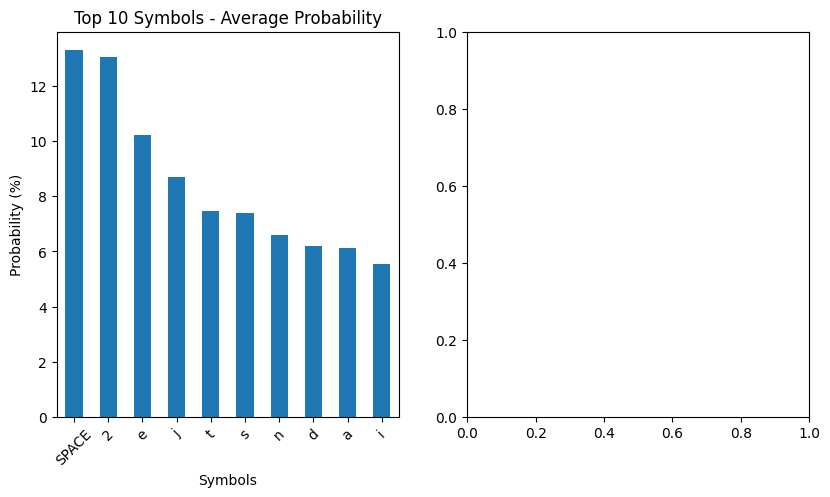

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV
df = pd.read_csv('expanded_symbol_probabilities.csv')

def plot_symbol_probabilities(df, top_n=10):
    """
    Multiple Visualization Techniques
    """
    # Exclude non-symbol columns
    symbol_columns = df.columns[5:]
    
    # 1. Bar Plot - Top Symbols
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    avg_probs = df[symbol_columns].mean()
    top_symbols = avg_probs.nlargest(top_n)
    top_symbols.plot(kind='bar')
    plt.title(f'Top {top_n} Symbols - Average Probability')
    plt.xlabel('Symbols')
    plt.ylabel('Probability (%)')
    plt.xticks(rotation=45)
    
    # 2. Box Plot - Symbol Distribution
    plt.subplot(132)
    df[symbol_columns].boxplot(column=top_symbols.index)
    plt.title(f'Probability Distribution - Top {top_n} Symbols')
    plt.xlabel('Symbols')
    plt.ylabel('Probability (%)')
    plt.xticks(rotation=45)
    
    # 3. Heatmap - Symbol Correlation
    plt.subplot(133)
    correlation_matrix = df[symbol_columns].corr()
    sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
    plt.title('Symbol Probability Correlation')
    
    plt.tight_layout()
    plt.show()

def advanced_symbol_analysis(df):
    """
    Comprehensive Symbol Probability Analysis
    """
    symbol_columns = df.columns[5:]
    
    # Basic Statistics
    symbol_stats = pd.DataFrame({
        'Mean': df[symbol_columns].mean(),
        'Median': df[symbol_columns].median(),
        'Std Dev': df[symbol_columns].std(),
        'Min': df[symbol_columns].min(),
        'Max': df[symbol_columns].max()
    }).sort_values('Mean', ascending=False)
    
    # Visualization
    plt.figure(figsize=(20, 10))
    
    # Detailed Probability Distribution
    plt.subplot(221)
    symbol_stats['Mean'].head(10).plot(kind='bar')
    plt.title('Top 10 Symbols - Mean Probability')
    plt.xlabel('Symbols')
    plt.ylabel('Mean Probability (%)')
    plt.xticks(rotation=45)
    
    # Violin Plot
    plt.subplot(222)
    sns.violinplot(data=df[symbol_columns].melt(), 
                   x='variable', 
                   y='value', 
                   cut=0)
    plt.title('Symbol Probability Distribution')
    plt.xlabel('Symbols')
    plt.ylabel('Probability (%)')
    plt.xticks(rotation=90)
    
    # Cumulative Probability
    plt.subplot(223)
    cumulative_probs = symbol_stats['Mean'].cumsum() / symbol_stats['Mean'].sum() * 100
    cumulative_probs.head(10).plot(kind='line', marker='o')
    plt.title('Cumulative Symbol Probability')
    plt.xlabel('Number of Symbols')
    plt.ylabel('Cumulative Probability (%)')
    
    # Pie Chart - Top Symbols
    plt.subplot(224)
    top_symbols = symbol_stats.head(5)
    plt.pie(top_symbols['Mean'], labels=top_symbols.index, autopct='%1.1f%%')
    plt.title('Top 5 Symbols Composition')
    
    plt.tight_layout()
    plt.show()
    
    return symbol_stats

df = pd.read_csv('expanded_symbol_probabilities.csv')

# Basic Visualization
plot_symbol_probabilities(df)

# Advanced Analysis
symbol_stats = advanced_symbol_analysis(df)
print(symbol_stats)

